*****************************************************************
#  The Social Web 
- Instructors Jacco van Ossenbruggen, Dayana Spagnuelo
- TAs Michael Accetto, Oktay Kavi, Abhirup Mukherjee, Nihat Uzunalioğlu
*****************************************************************

Prerequisites:
- Python 3.8
- Python packages: twitter, prettytable, matplotlib

First you need to know how to retrieve some social web data. Exercises 1 and 2 will show you how to retrieve trends and search results from Twitter. 

But let's check first if we're running a sufficiently new version of Python:

In [2]:
import platform
import sys
print("This jupyter notebook is running on Python " + platform.python_version())
# It's good practice to assert packages requirements at the beginning of a script:
assert sys.version_info >= (3, 6) # Tested with Python==3.7.5

This jupyter notebook is running on Python 3.8.6


Let's install now the required packages for this hands on session:

In [3]:
# If you're using a virtualenv, make sure its activated before running 
# this cell!
!pip install twitter PrettyTable matplotlib

## Part 1: Authorizing an application to access Twitter account data (from Example 1-1/9-1 in Mining the Social Web):

1. Make sure to add your mobile phone number to your private twitter profile.
2. Go to https://apps.twitter.com/ and click on "create an app". Twitter will prompt you to create a *developer account*.
3. You'll receive an *account confirmation* email with a link. Follow it and create an app. 
4. Once the app is created, you'll see a "Keys and Token" item on the top left-hand side corner of the webpage. These values will be needed to fill in the next cell.
5. Please delete all your keys before submission.

In [28]:
import twitter # Tell Python to use the twitter package
CONSUMER_KEY = ''
CONSUMER_SECRET = ''
# to get the oauth credential you need to click on the 'Generate access token' button:
OAUTH_TOKEN = '' 
OAUTH_TOKEN_SECRET = ''
auth = twitter.oauth.OAuth(OAUTH_TOKEN, OAUTH_TOKEN_SECRET,CONSUMER_KEY, CONSUMER_SECRET)
twitter_api = twitter.Twitter(auth=auth)
print(twitter_api) 
# Nothing to see by displaying twitter_api except that it's now a defined variable


### 1.1: Retrieving twitter search trends (from Example 1-2/9-2 in Mining the Social Web)

In [5]:
import json
WORLD_WOE_ID = 1 # The "Yahoo! Where On Earth ID" for the entire world
world_trends = twitter_api.trends.place(_id=WORLD_WOE_ID) # get back a callable
print(json.dumps(world_trends,indent=2))

[
  {
    "trends": [
      {
        "name": "#MaisVoce",
        "url": "http://twitter.com/search?q=%23MaisVoce",
        "promoted_content": null,
        "query": "%23MaisVoce",
        "tweet_volume": 21772
      },
      {
        "name": "#\u76e3\u5bdf\u533b\u671d\u9854",
        "url": "http://twitter.com/search?q=%23%E7%9B%A3%E5%AF%9F%E5%8C%BB%E6%9C%9D%E9%A1%94",
        "promoted_content": null,
        "query": "%23%E7%9B%A3%E5%AF%9F%E5%8C%BB%E6%9C%9D%E9%A1%94",
        "tweet_volume": 18963
      },
      {
        "name": "\u30cd\u30d7\u30ea\u30fc\u30b0",
        "url": "http://twitter.com/search?q=%E3%83%8D%E3%83%97%E3%83%AA%E3%83%BC%E3%82%B0",
        "promoted_content": null,
        "query": "%E3%83%8D%E3%83%97%E3%83%AA%E3%83%BC%E3%82%B0",
        "tweet_volume": 97947
      },
      {
        "name": "Ana Maria Braga",
        "url": "http://twitter.com/search?q=%22Ana+Maria+Braga%22",
        "promoted_content": null,
        "query": "%22Ana+Maria+Braga%22",
      

### Task 1
Twitter uses WOEIDs. Find out how WORLD_WOE_IDs were originally defined by Yahoo! and try to use others in a query. What kind of differences do you find between the worldwide trends and the local trends? 


In [6]:
# Your code here
SG_ID = 23424948
SG_trends = twitter_api.trends.place(_id=SG_ID)
print(json.dumps(SG_trends,indent=1))

[
 {
  "trends": [
   {
    "name": "Wonpil",
    "url": "http://twitter.com/search?q=Wonpil",
    "promoted_content": null,
    "query": "Wonpil",
    "tweet_volume": 48610
   },
   {
    "name": "woong",
    "url": "http://twitter.com/search?q=woong",
    "promoted_content": null,
    "query": "woong",
    "tweet_volume": 13596
   },
   {
    "name": "behind you",
    "url": "http://twitter.com/search?q=%22behind+you%22",
    "promoted_content": null,
    "query": "%22behind+you%22",
    "tweet_volume": 71799
   },
   {
    "name": "Rest In Peace",
    "url": "http://twitter.com/search?q=%22Rest+In+Peace%22",
    "promoted_content": null,
    "query": "%22Rest+In+Peace%22",
    "tweet_volume": 115785
   },
   {
    "name": "Woojin",
    "url": "http://twitter.com/search?q=Woojin",
    "promoted_content": null,
    "query": "Woojin",
    "tweet_volume": 117410
   },
   {
    "name": "Kim Taehyung",
    "url": "http://twitter.com/search?q=%22Kim+Taehyung%22",
    "promoted_content": nu

### 1.2: Retrieving search results (from Example 1-5/9-3 in Mining the Social Web):

In [7]:
q = '#ThrowbackThursday' # XXX: Set this variable to a trending topic, or anything else you like. 
count = 100 # number of results to retrieve

# See https://dev.twitter.com/docs/api/1.1/get/search/tweets for more info

search_results = twitter_api.search.tweets(q=q, count=count) # search for your query 'q' 100 times
statuses = search_results['statuses'] # extract the tweets found

# The following code allows you to print in a nice format the contents of search_results
import json
print(len(statuses))
print(json.dumps(statuses[0], indent=1))

79
{
 "created_at": "Mon Nov 02 12:50:44 +0000 2020",
 "id": 1323246161751351296,
 "id_str": "1323246161751351296",
 "text": "RT @lilmonix3: THROWBACK! i'm missing my friends extra today~ did i ever show you this picnic we did??  \ud83c\udf04 look at yuri helping natsuki bake\u2026",
 "truncated": false,
 "entities": {
  "hashtags": [],
  "symbols": [],
  "user_mentions": [
   {
    "screen_name": "lilmonix3",
    "name": "Monika",
    "id": 4926430119,
    "id_str": "4926430119",
    "indices": [
     3,
     13
    ]
   }
  ],
  "urls": []
 },
 "metadata": {
  "iso_language_code": "en",
  "result_type": "recent"
 },
 "source": "<a href=\"http://twitter.com/download/android\" rel=\"nofollow\">Twitter for Android</a>",
 "in_reply_to_status_id": null,
 "in_reply_to_status_id_str": null,
 "in_reply_to_user_id": null,
 "in_reply_to_user_id_str": null,
 "in_reply_to_screen_name": null,
 "user": {
  "id": 1301521254764220419,
  "id_str": "1301521254764220419",
  "name": "\uc2a4\ud50c\uc811\

### Task 2

In the cell below, create a second variable (e.g. `statuses2`) that holds the results of a query other than the one presented above. Think about a query that would yield very different results than the first one, for example one that may yield a shorter output or about a different topic.

In [8]:
# your code here
query_trend = "Apple"
num = 99
res = twitter_api.search.tweets(q=query_trend,count=num)
statuses_my = res["statuses"]
res_num = len(statuses_my)
json_view = json.dumps(statuses_my,indent=2)
print(res_num)
print(json_view)

99
[
  {
    "created_at": "Mon Nov 02 13:05:07 +0000 2020",
    "id": 1323249783721611266,
    "id_str": "1323249783721611266",
    "text": "RT @Bloch_R: Le plus \"incroyable\" avec les GAFA (Google, Apple, Facebook et Amazon) n'est pas leur taille, mais leur capacit\u00e9 \u00e0 continuer d\u2026",
    "truncated": false,
    "entities": {
      "hashtags": [],
      "symbols": [],
      "user_mentions": [
        {
          "screen_name": "Bloch_R",
          "name": "Rapha\u00ebl Bloch",
          "id": 364784696,
          "id_str": "364784696",
          "indices": [
            3,
            11
          ]
        }
      ],
      "urls": []
    },
    "metadata": {
      "iso_language_code": "fr",
      "result_type": "recent"
    },
    "source": "<a href=\"http://twitter.com/download/iphone\" rel=\"nofollow\">Twitter for iPhone</a>",
    "in_reply_to_status_id": null,
    "in_reply_to_status_id_str": null,
    "in_reply_to_user_id": null,
    "in_reply_to_user_id_str": null

## Part 2: Extracting text, screen names, and hashtags from tweets (from Example 1-6 in Mining the Social Web)

Simply printing all the search results to screen is nice, but to really start analysing them, it is handy to select the interesting parts and store them in a different structure such as a list. 

In this example you are using a thing called "List Comprehension".

### 2.1 List Comprehensions
List comprehension is a powerful construct that allows to succinctly build a list.
With it you can process items from any iterable (e.g. dictionaries, lists, tuples, iterators...) and output a list while optionally performing an operation on each value.

Here's a few examples:

In [9]:
# double all values from 0 to 9
double_list = [i*2 for i in range(10)]
# raise to the power of 2, but only if the number is uneven
power_even_list = [i**2 for i in range(10) if i%2!=0]
# clean strings in a tuple
stripped_lines = [x.strip() for x in ('The\n', 'Social\t', 'Web\n')]
# return length of each string in stripped_lines
len_str_lines = [len(s) for s in stripped_lines]
# finally, we can nest list comprehensions to flatten a list of lists:
list_of_lists = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
range_9 = [x \
           for y in list_of_lists \
               for x in y]
range_10 = []
for y in list_of_lists:
    for z in y:
        range_10.append(z)

print(double_list)
print(power_even_list)
print(stripped_lines)
print(len_str_lines)
print(range_9)
print(range_10)

[0, 2, 4, 6, 8, 10, 12, 14, 16, 18]
[1, 9, 25, 49, 81]
['The', 'Social', 'Web']
[3, 6, 3]
[1, 2, 3, 4, 5, 6, 7, 8, 9]
[1, 2, 3, 4, 5, 6, 7, 8, 9]


### 2.2 Parsing text, screen names and hashtags from tweets
*(from Example 1-6 in Mining the Social Web)*

Hereafter, we'll be creating a variable `status_texts` of type list. \
The list will be filled with the `text` elements from each `status`, whereas `status` comes from looping through all `statuses` in the `search_results` list (1.2). \
Look up the list comprehensions in your Python reference materials to make sure you understand what's happening here. 

In [10]:
status_texts = [ status['text'] for status in statuses ]
# the escape character "\" allows for the list comprehension to continue
# on a new line. While not strictly necessary, it makes code more readable
# for your fellow programmers.
screen_names = [ user_mention['screen_name'] \
                for status in statuses \
                    for user_mention in status['entities']['user_mentions'] ]

hashtags = [ hashtag['text']\
            for status in statuses \
                for hashtag in status['entities']['hashtags'] ]

# Compute a collection of all words from all tweets
words = [ w \
         for t in status_texts \
             for w in t.split() ] #split the string on the empty spaces

# Explore the first 5 items for each...
print(json.dumps(status_texts[0:5], indent=1))
print(json.dumps(screen_names[0:5], indent=1))
print(json.dumps(hashtags[0:5], indent=1))
print(json.dumps(words[0:5], indent=1))

[
 "RT @lilmonix3: THROWBACK! i'm missing my friends extra today~ did i ever show you this picnic we did??  \ud83c\udf04 look at yuri helping natsuki bake\u2026",
 "RT @lilmonix3: THROWBACK! i'm missing my friends extra today~ did i ever show you this picnic we did??  \ud83c\udf04 look at yuri helping natsuki bake\u2026",
 "RT @AdeleRoberts: I hope this says what I think it says...\n\ud55c\uad6d\uc5b4 \uc798 \ubabb\ud574\uc694! \n\uace0\ub9c8\uc6cc\uc694 \uae40\uc11d\uc9c4, \ubbfc\uc724\uae30, \uae40\ub0a8\uc900, \uc815\ud638\uc11d, \ubc15\uc9c0\ubbfc, \uae40\ud0dc\ud615 &amp; \uc804\uc815\uad6d! \ub9cc\ub098\uc11c \uae30\ubed0\uc694! \uc9c4\uc9dc \ub9ce\uc774 \uace0\ub9c8\uc6cc\uc694! \n@bbcr\u2026",
 "RT @lilmonix3: THROWBACK! i'm missing my friends extra today~ did i ever show you this picnic we did??  \ud83c\udf04 look at yuri helping natsuki bake\u2026",
 "RT @SpotifyJP: \ud83c\udf1f80\u5e74\u4ee3\u306e\u30a2\u30cb\u30e1\u30bd\u30f3\u30b0\u3092\u30b9\u30ed\u30fc\u30d0\u30c3\u30af\

### Task 3

You are now ready to parse usernames, hashtags and text from the results you previously obtained in Task 2 (e.g. `statuses_2`). While doing it, make sure to leave the variables created in 2.2 untouched. Instead, create your own variable names, which you'll be using soon.


In [12]:
# your code here
usernames_my = [user_mention['screen_name']\
            for status in statuses_my\
                for user_mention in status['entities']['user_mentions']]

hashtags_my = [hashtag['text']\
           for status in statuses_my\
               for hashtag in status['entities']['hashtags']]

text_my = [status['text']\
       for status in statuses_my]

words_my = [w\
          for string in text_my\
              for w in string.split()]

print(json.dumps({'usernames':usernames_my[0:10]},indent=2))
print(json.dumps({'hashtags':hashtags_my[0:10]},indent=2))
print(json.dumps({'text':text_my[0:10]},indent=2))
print(json.dumps({'words':words_my[0:10]},indent=2))

{
  "usernames": [
    "Bloch_R",
    "dragon_dkbll",
    "thejboyshow",
    "Rivals",
    "247Sports",
    "_JHokanson",
    "apple_lover613",
    "utikoma",
    "gfeedk",
    "shimasaki_hm"
  ]
}
{
  "hashtags": [
    "iPhone12Pro",
    "iPhone\u4e0d\u5177\u5408",
    "iPhone",
    "Apple",
    "fukuoka",
    "hakata",
    "disneyfan",
    "apple",
    "stevejobs",
    "mrchildren"
  ]
}
{
  "text": [
    "RT @Bloch_R: Le plus \"incroyable\" avec les GAFA (Google, Apple, Facebook et Amazon) n'est pas leur taille, mais leur capacit\u00e9 \u00e0 continuer d\u2026",
    "If you\u2019re afraid of getting a rotten apple, don\u2019t reach into the barrel. Get it off the tree.",
    "RT @dragon_dkbll: \u3069\u306a\u305f\u304b\u3001\u3053\u306e\u97f3\u3084\u30ab\u30e1\u30e9\u306e\u4e8b\u3067\u6539\u5584\u65b9\u6cd5\u304c\u3042\u308c\u3070\u3001\u662f\u975eDM\u4e0b\u3055\u3044\u3002\u3088\u308d\u3057\u304f\u304a\u9858\u3044\u3057\u307e\u3059\u3002\n#iPhone12Pro \n#iPhone\u4e0d\u5177\u5408\n#i

## Part 3: Creating a basic frequency distribution from words in tweets
*(from Examples 1-7 in Mining the Social Web)* 


In the cell below we display the 10 most common hashtag instances:

In [13]:
from collections import Counter

for item in [words, screen_names, hashtags]:
    c = Counter(item)
    
print(c.most_common()[:10]) # top 10

[('ThrowbackThursday', 44), ('AsianCup2019', 6), ('throwbackthursday', 2), ('teide', 2), ('tenerife', 2), ('picoviejo', 2), ('sky', 2), ('lockdown', 2), ('ガンダム', 1), ('タッチ', 1)]


Your output should look something like this: \
`[('ThrowbackThursday', 34), ('throwbackthursday', 11), ('TBT', 6), ('ThrowBackThursday', 6), ('Trivia', 3), ('madoka_magica', 2), ('New', 2), ('EURO2020', 2), ('artists', 2)]`

### Task 4
Show hashtags frequency for results that you obtained in Task 3. Think about possible explanations for the different results you get from the analyses for the different queries.


In [17]:
# You code here
from collections import Counter

for item in [words_my, usernames_my, hashtags_my]:
    count = Counter(item)
    print(count.most_common()[:10])
    print()

[('RT', 46), ('Apple', 24), ('on', 23), ('to', 20), ('Google', 13), ('the', 12), ('is', 11), ('apple', 10), ('Music', 9), ('-', 8)]

[('archivegukk', 5), ('FRESTA_81', 5), ('OfficialMonstaX', 4), ('arashi5official', 3), ('AppleMusicJapan', 3), ('AppleMusic', 3), ('pmcafrica', 2), ('Apple', 2), ('SamsungMobileSA', 2), ('adorebybeykook', 2)]

[('JK', 5), ('apple', 4), ('PartyStarters', 3), ('몬스타엑스', 3), ('fukuoka', 2), ('hakata', 2), ('disneyfan', 2), ('stevejobs', 2), ('mrchildren', 2), ('BlueMoon', 2)]



### 3.1 Storing your results
So far, we have been storing the data in working memory. Often it's handy to store your data to disk so you can retrieve it in a next session. 

The pickle module lets you do exactly that, by serializing data in a binary format.


In [18]:
import pickle

filepath = "my_data.pickle"
# this indented python syntax is broadly defined as "context manager".
# This means that everything happening under its indentation will use f
# as file handle to filepath. The Shortand `wb` stands for "write binary",
# which is how we serialize data to disk.
with open(filepath, "wb") as f:
    pickle.dump(words, f) # write the contents of list 'words' to file 'f'
    
# Note that, after the end of the indented block, the file is automatically closed.
# Hence, no memory resource on your system is wasted idly.

If you browse to your working directory, you should find a file there named "myData.pickle". You can open this in a text editor, or load its contents back into a variable to do some more analyses on.


In [19]:
# open the myData.pickle file and store its contents into variable 'words'

with open(filepath, "rb") as f:
    words = pickle.load(f)
print(words)

['RT', '@lilmonix3:', 'THROWBACK!', "i'm", 'missing', 'my', 'friends', 'extra', 'today~', 'did', 'i', 'ever', 'show', 'you', 'this', 'picnic', 'we', 'did??', '🌄', 'look', 'at', 'yuri', 'helping', 'natsuki', 'bake…', 'RT', '@lilmonix3:', 'THROWBACK!', "i'm", 'missing', 'my', 'friends', 'extra', 'today~', 'did', 'i', 'ever', 'show', 'you', 'this', 'picnic', 'we', 'did??', '🌄', 'look', 'at', 'yuri', 'helping', 'natsuki', 'bake…', 'RT', '@AdeleRoberts:', 'I', 'hope', 'this', 'says', 'what', 'I', 'think', 'it', 'says...', '한국어', '잘', '못해요!', '고마워요', '김석진,', '민윤기,', '김남준,', '정호석,', '박지민,', '김태형', '&amp;', '전정국!', '만나서', '기뻐요!', '진짜', '많이', '고마워요!', '@bbcr…', 'RT', '@lilmonix3:', 'THROWBACK!', "i'm", 'missing', 'my', 'friends', 'extra', 'today~', 'did', 'i', 'ever', 'show', 'you', 'this', 'picnic', 'we', 'did??', '🌄', 'look', 'at', 'yuri', 'helping', 'natsuki', 'bake…', 'RT', '@SpotifyJP:', '🌟80年代のアニメソングをスローバック🌟', '#ガンダム、#タッチ、', '#ドラゴンボール、#うる星やつら…', '名アニメを彩ってきた今も色褪せない楽曲の数々を、1つのプレイリストで🎶', '🎧"A

### 3.2 Using prettytable to display tuples in a nice way



In [20]:
from prettytable import PrettyTable
for label, data in (('Word', words),
                    ('Screen Name', screen_names),
                    ('Hashtag', hashtags)):
    pt = PrettyTable(field_names=[label, 'Count'])
    c = Counter(data)
    [ pt.add_row(kv) for kv in c.most_common()[:10] ]
    pt.align[label], pt.align['Count'] = 'l', 'r' # Set column alignment
    print(pt) 

+--------------------+-------+
| Word               | Count |
+--------------------+-------+
| RT                 |    75 |
| the                |    51 |
| to                 |    32 |
| #ThrowbackThursday |    30 |
| of                 |    27 |
| in                 |    23 |
| at                 |    21 |
| we                 |    20 |
| you                |    19 |
| this               |    18 |
+--------------------+-------+
+-----------------+-------+
| Screen Name     | Count |
+-----------------+-------+
| lilmonix3       |    12 |
| tht_hmo         |     8 |
| FIFAcom         |     6 |
| GarySiniseFound |     2 |
| urban_splash    |     2 |
| stani320        |     2 |
| Jacksons        |     2 |
| RealFunkyvoices |     2 |
| AdeleRoberts    |     1 |
| SpotifyJP       |     1 |
+-----------------+-------+
+-------------------+-------+
| Hashtag           | Count |
+-------------------+-------+
| ThrowbackThursday |    44 |
| AsianCup2019      |     6 |
| throwbackthursday |   

### 3.3 Calculating lexical diversity for tweets 
*(from Example 1-9 in Mining the Social Web)*:

In [21]:
# Define a function for computing lexical diversity
def lexical_diversity(tokens):
    return 1.0*len(set(tokens))/len(tokens)

# Define a function for computing the average number of words per tweet
def average_words(statuses):
    total_words = sum([ len(s.split()) for s in statuses ])
    return 1.0*total_words/len(statuses) 

# Let's use these functions:

print(lexical_diversity(words))
print(lexical_diversity(screen_names))
print(lexical_diversity(hashtags))
print(average_words(status_texts))

0.3985419198055893
0.6853932584269663
0.5263157894736842
20.835443037974684


### Task 5: What do the printed numbers indicate? Try to explain them.

(*Double click this cell to write your answer*)

The first function shows us an view that how many different words in the total words set. Actually, it provides the word diversity in a given list of words. There are several regular words like articles, everyday vocabulary, greeting words. That is why that the words in the Tweets have less diversity in the first result. The second line of result shows the highest diversity since it represents the user names which are not easily repeated. The third result is for the diversity of Hashtags. Usually, one Tweet can have not only one hashtag related to the content. Therefore, this result indicates the low diversity.

The second function shows how many words average in one "text". It is called to calculate how many words in a Tweet. The number let us konw user may not be willing to type too many words.

### 3.4 Finding the most popular retweets 
*(from Example 1-10 in Mining the Social Web):*

In [22]:
retweet_cnt_un_txt = [(status['retweet_count'],
    status['retweeted_status']['user']['screen_name'],
    status['text'])# Store out a tuple of these three values
    for status in statuses # for each status
    if 'retweeted_status' in status # ... so long as the status meets this condition.
    ]

# Slice off the first 5 from the sorted results and display each item in the tuple
pt = PrettyTable(field_names=['Count', 'Screen Name', 'Text'])
[ pt.add_row(row) for row in sorted(retweet_cnt_un_txt, reverse=True)[:5] ]
pt.max_width['Text'] = 50
pt.align= 'l'
print(pt)

+--------+--------------+----------------------------------------------------+
| Count  | Screen Name  | Text                                               |
+--------+--------------+----------------------------------------------------+
| 121448 | AdeleRoberts | RT @AdeleRoberts: I hope this says what I think it |
|        |              | says...                                            |
|        |              | 한국어 잘 못해요!                                  |
|        |              | 고마워요 김석진, 민윤기, 김남준, 정호석, 박지민, 김태형 &amp; 전정국! 만나서 |
|        |              | 기뻐요! 진짜 많이 고마워요!                        |
|        |              | @bbcr…                                             |
| 11779  | SB19Official | RT @SB19Official: #ThrowbackThursday‼️              |
|        |              |                                                    |
|        |              | Did you catch our cover of @ygofficialblink's      |
|        |              | #DDUDUDDUDU with our amazing trainer &amp;   

### 3.5 Looking up users who have retweeted a status 
*(from Example 1-11 in Mining the Social Web):*

In [75]:
retweets = twitter_api.statuses.retweets(id=1323014399888687116) # Get the original tweet id for a tweet from its retweeted_status node and insert it here
print("Users who've retweeted the tweet:\n")
print([r['user']['screen_name'] for r in retweets])

Users who've retweeted the tweet:

[]


### Task 6 (advanced)

If you have a Twitter account with a nontrivial number of tweets, request your historical tweet archive from your account settings and analyze it. \
The export of your account data includes files organized by time period in a convenient JSON format. See the README.txt file included in the downloaded archive for more details. 



What are the most common terms that appear in your tweets? \
Who do you retweet the most often? \
How many of your tweets are retweeted (and why do you think this is the case)?

### 3.6 Plotting frequencies of words 
*(from Example 1-12 in Mining the Social Web)*


In the previous exercises we have been looking at the text from the tweets, but when you retrieved the results, you retrieved much more information about the tweets, such as the username of the person who shared this tweet with the world. 


You can use this information to find out who retweets whom in our examples. 

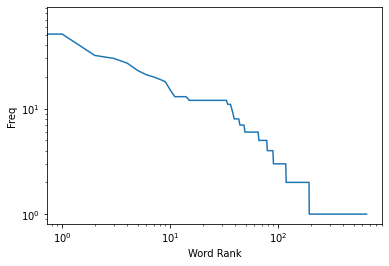

In [24]:
word_counts = sorted(Counter(words).values(), reverse=True)
import matplotlib.pyplot as plt
plt.loglog(word_counts)
plt.ylabel("Freq")
plt.xlabel("Word Rank")
plt.show()

### Generating histograms of words, screen names, and hashtags 
*(from Example 1-13 in Mining the Social Web):*

656
dict_values([75, 12, 12, 12, 12, 15, 12, 13, 12, 12, 12, 12, 13, 19, 18, 12, 20, 12, 12, 12, 21, 12, 12, 12, 12, 1, 9, 1, 1, 2, 5, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 6, 6, 13, 6, 6, 6, 7, 6, 7, 6, 12, 6, 6, 7, 23, 6, 6, 6, 10, 51, 6, 1, 1, 1, 4, 1, 1, 1, 6, 2, 1, 1, 1, 1, 1, 1, 1, 4, 1, 30, 32, 4, 1, 1, 1, 1, 11, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 4, 2, 2, 2, 3, 2, 12, 8, 5, 2, 27, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 13, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 3, 1, 1, 1, 4, 1, 2, 6, 2, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 11, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 7, 1, 1, 1, 1, 1, 1, 2, 4, 1, 1, 1, 8, 8, 8, 7, 6, 8, 11, 5, 5, 5, 5, 5, 5, 5, 1, 1, 1, 1, 2, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 

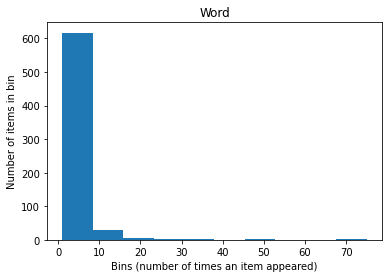

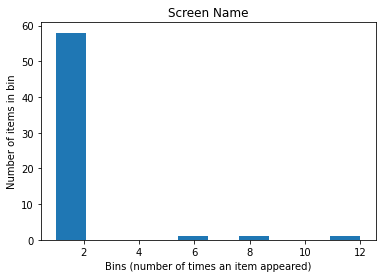

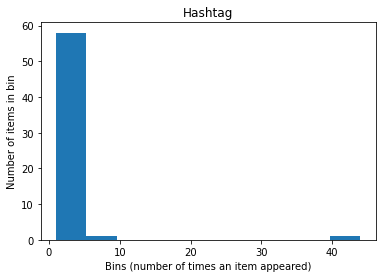

<Figure size 432x288 with 0 Axes>

In [25]:
for label, data in (('Word', words),
                    ('Screen Name', screen_names),
                    ('Hashtag', hashtags)):
    c = Counter(data)
    print(len(c))
    print(c.values())
    plt.hist(c.values())
    
    plt.title(label)
    plt.ylabel("Number of items in bin")
    plt.xlabel("Bins (number of times an item appeared)")
    
    plt.figure()

c:\socialenv\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\socialenv\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

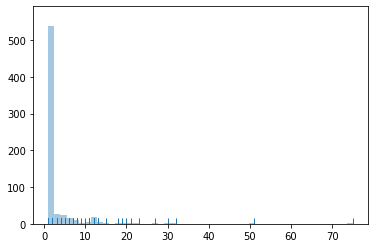

In [32]:
# extra: seaborn plots with a one-liner.
!pip install seaborn
import seaborn as sns

sns.distplot(word_counts, kde=False, rug=True)
